In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
def F(x):
    return np.array([
        x[0]**2 - x[1]**2 - 5,
        x[0]**2 + x[1]**2 - 25
    ])

In [9]:
def J(x):
    return np.array([
        [2*x[0], -2*x[1]],
        [2*x[0],  2*x[1]]
    ])


In [16]:
def plot_system_and_iterations(history):
    x_vals = np.linspace(-6, 6, 400)
    y_vals = np.linspace(-6, 6, 400)
    X, Y = np.meshgrid(x_vals, y_vals)

    f1 = X**2 - Y**2 - 5
    f2 = X**2 + Y**2 - 25

    plt.figure(figsize=(8, 8))
    # plt.contour(X, Y, f1, levels=[0], colors='blue', label='f1 = 0')
    # plt.contour(X, Y, f2, levels=[0], colors='green', label='f2 = 0')

    iter_x = [pt[0] for pt in history]
    iter_y = [pt[1] for pt in history]

    plt.plot(iter_x, iter_y, 'ro--', label='Iterations')
    plt.scatter(iter_x[-1], iter_y[-1], color='black', zorder=5, label='Final Point')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Newton-Raphson Method for System of Equations')
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()

In [17]:
def newton_raphson_system(F, J, x0, tol=1e-6, max_iter=20, visulize=True):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    for i in range(max_iter):
        Fx = F(x)
        Jx = J(x)
        try:
            delta = np.linalg.solve(Jx, Fx)
        except np.linalg.LinAlgError:
            raise ValueError("Jacobian is singular at iteration", i)

        x = x - delta
        history.append(x.copy())
        if np.linalg.norm(delta, ord=2) < tol:
            print(f"Converged in {i+1} iterations.")
            if visulize:
                plot_system_and_iterations(history)
            else:
                print("Visualization skipped.")
            return x
    raise ValueError("Did not converge.")



Converged in 5 iterations.


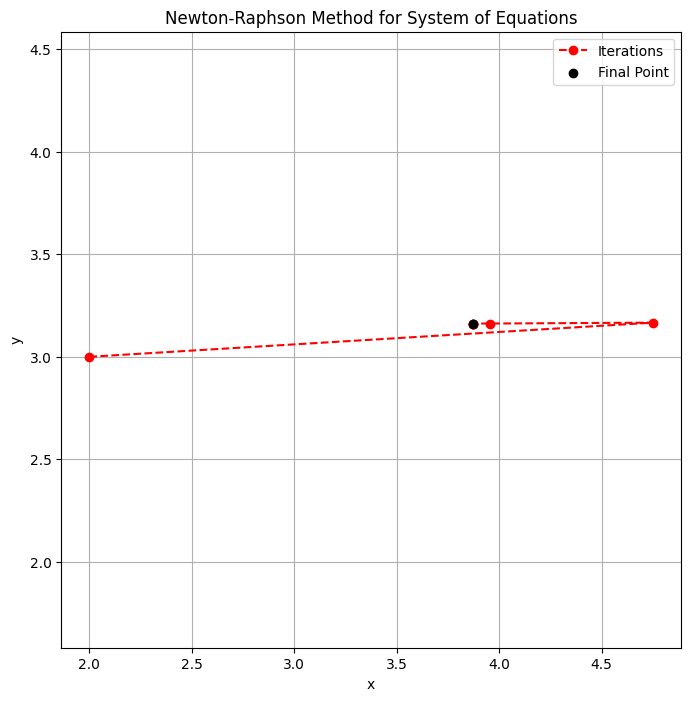

Solution: [3.87298335 3.16227766]


In [18]:
x0 = [2.0, 3.0]
solution = newton_raphson_system(F, J, x0)
print("Solution:", solution)

In [19]:
def F2(x):
    return np.array([
        x[0]**2 - x[1]**2 + x[2]**2 - 9,
        x[0] + x[1] -x[2]**0.5 - 1,
        x[0]**2 -x[1] +  np.cos(x[2]) - 3 
    ])